## Chargement des données et aperçu général

In [1]:
import pandas as pd

# Charger le dataset
file_path = "../creditcard.csv"
df = pd.read_csv(file_path)

# Afficher les premières lignes
print("🔹 Aperçu des données :")
display(df.head())

# Vérifier les dimensions
print(f"\n🔹 Dimensions du dataset : {df.shape}")


🔹 Aperçu des données :


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0



🔹 Dimensions du dataset : (284807, 31)


## Vérification des types de données et des valeurs manquantes

In [2]:
# Vérifier les types des colonnes
print("\n🔹 Types des colonnes :")
print(df.info())

# Vérifier les valeurs manquantes
print("\n🔹 Valeurs manquantes par colonne :")
print(df.isnull().sum())



🔹 Types des colonnes :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null 

Toutes les colonnes sont de type float64 sauf la colonne Class qui est un entier (int64).

Aucune valeur manquante dans le dataset.

## Analyse Univariée

C:\Users\yohar\AppData\Local\Temp\ipykernel_34176\2556120687.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Class"], palette="coolwarm")


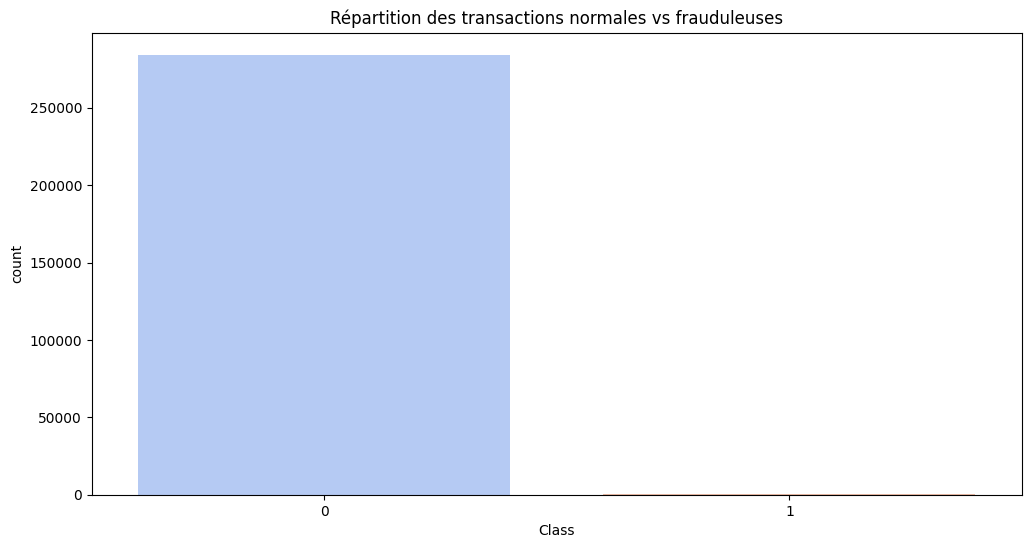

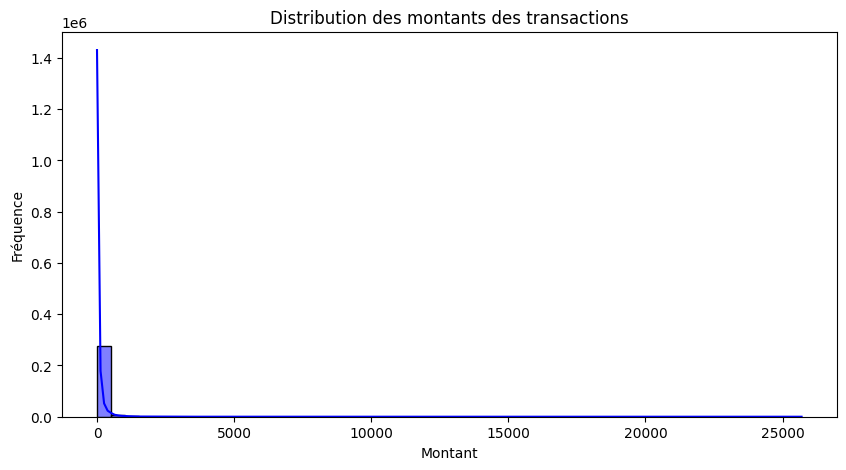

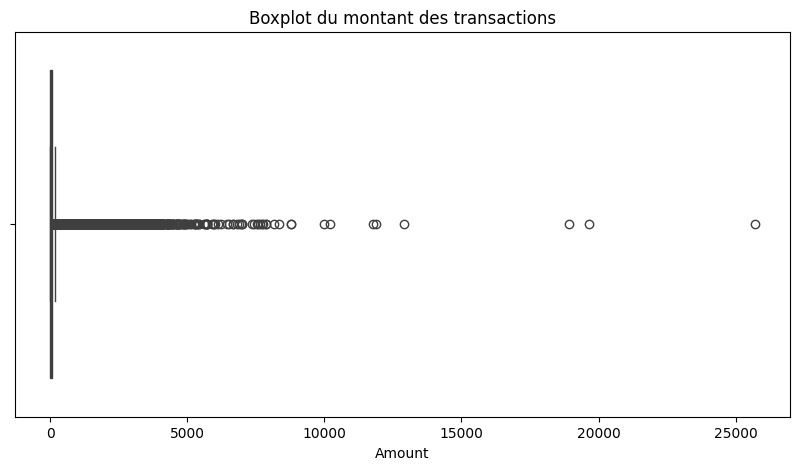

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Définir la taille des plots
plt.figure(figsize=(12, 6))

# Distribution de la variable cible (Class)
sns.countplot(x=df["Class"], palette="coolwarm")
plt.title("Répartition des transactions normales vs frauduleuses")
plt.show()

# Histogramme de la variable 'Amount' (montant des transactions)
plt.figure(figsize=(10, 5))
sns.histplot(df["Amount"], bins=50, kde=True, color="blue")
plt.title("Distribution des montants des transactions")
plt.xlabel("Montant")
plt.ylabel("Fréquence")
plt.show()

# Boxplot pour détecter les valeurs aberrantes de 'Amount'
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Amount"])
plt.title("Boxplot du montant des transactions")
plt.show()


Résultats de l'étape 3 : Analyse Univariée
Répartition des transactions (Class) :

La classe 0 (transactions normales) est largement dominante par rapport à la classe 1 (transactions frauduleuses).
Ce dataset est fortement déséquilibré, ce qui est une information importante pour la suite de l'analyse.
Distribution des montants des transactions (Amount) :

La majorité des transactions ont des montants faibles.
Quelques transactions ont des montants très élevés, ce qui peut représenter des valeurs aberrantes.
Boxplot de Amount :

On observe des valeurs extrêmes dans le montant des transactions.
Cela peut nécessiter un traitement comme la normalisation ou la suppression des outliers.

## Analyse Bivariée

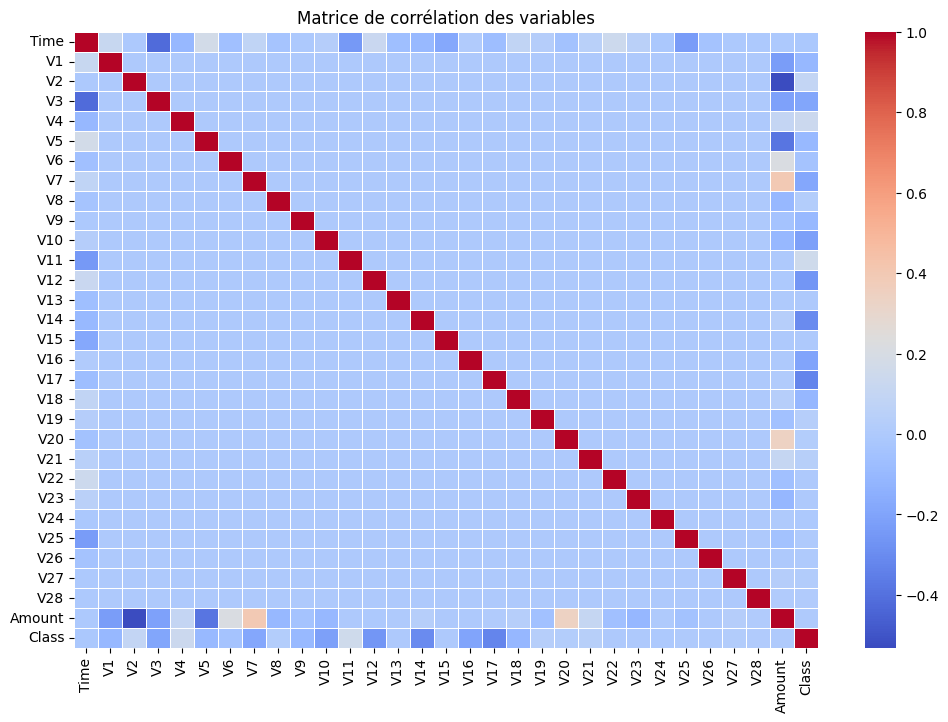

C:\Users\yohar\AppData\Local\Temp\ipykernel_34176\2391895343.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="Amount", data=df, palette="coolwarm")


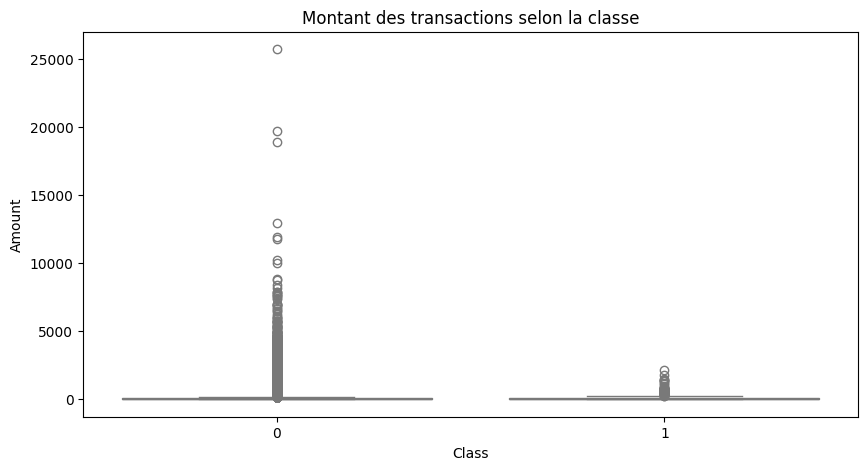

In [4]:
# Matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Matrice de corrélation des variables")
plt.show()

# Boxplot de 'Amount' en fonction de la classe (fraude ou non)
plt.figure(figsize=(10, 5))
sns.boxplot(x="Class", y="Amount", data=df, palette="coolwarm")
plt.title("Montant des transactions selon la classe")
plt.show()


Résultats de l'étape 4 : Analyse Bivariée
Matrice de corrélation :

Aucune forte corrélation apparente entre les variables.
La plupart des variables sont faiblement corrélées entre elles, ce qui peut être dû au fait qu'elles sont issues d'une transformation PCA (probablement pour anonymiser les données).
Boxplot du montant des transactions selon la classe :

Les transactions frauduleuses ont tendance à avoir des montants plus élevés que les transactions normales.
Cela pourrait indiquer une relation entre le montant et la fraude, mais d'autres variables doivent être analysées pour confirmer cette tendance.

## Détection des valeurs aberrantes

In [5]:
# Détection des valeurs aberrantes avec l'IQR
Q1 = df["Amount"].quantile(0.25)
Q3 = df["Amount"].quantile(0.75)
IQR = Q3 - Q1

# Définition des bornes pour détecter les outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrer les valeurs aberrantes
outliers = df[(df["Amount"] < lower_bound) | (df["Amount"] > upper_bound)]

# Afficher les premières valeurs aberrantes détectées
print(f"\n🔹 Nombre de valeurs aberrantes détectées : {outliers.shape[0]}")
display(outliers.head())



🔹 Nombre de valeurs aberrantes détectées : 31904


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
20,16.0,0.694885,-1.361819,1.029221,0.834159,-1.191209,1.309109,-0.878586,0.445290,-0.446196,...,-0.295583,-0.571955,-0.050881,-0.304215,0.072001,-0.422234,0.086553,0.063499,231.71,0
51,36.0,-1.004929,-0.985978,-0.038039,3.710061,-6.631951,5.122103,4.371691,-2.006868,-0.278736,...,1.393406,-0.381671,0.969719,0.019445,0.570923,0.333278,0.857373,-0.075538,1402.95,0
64,42.0,-0.522666,1.009923,0.276470,1.475289,-0.707013,0.355243,1.559849,-0.399579,-0.479813,...,0.172401,1.011543,0.069666,0.157820,-1.109224,-0.302369,0.318170,0.316910,243.66,0
85,55.0,-4.575093,-4.429184,3.402585,0.903915,3.002224,-0.491078,-2.705393,0.666451,1.922216,...,-0.047365,0.853360,-0.971600,-0.114862,0.408300,-0.304576,0.547785,-0.456297,200.01,0


Résultats de l'étape 5 : Détection des valeurs aberrantes
31 904 transactions ont été détectées comme des outliers selon la méthode de l'IQR.
Les montants élevés semblent être des valeurs atypiques.

## Conclusions de l'Analyse Exploratoire des Données (AED)
### Déséquilibre des classes <br>
La majorité des transactions sont normales (Class = 0).<br>
Très peu de transactions sont frauduleuses (Class = 1).<br>
Un rééquilibrage des classes (SMOTE, sous-échantillonnage) pourrait être nécessaire pour un modèle prédictif.
### Valeurs aberrantes sur le montant des transactions <br>
Des montants très élevés sont détectés comme outliers.
Il faudra analyser si ces valeurs doivent être normalisées ou exclues.
### Corrélation faible entre les variables <br>
Peu de variables montrent une relation forte entre elles.
La plupart des variables (V1 à V28) semblent être issues d'une transformation PCA.
### Les transactions frauduleuses ont tendance à avoir des montants plus élevés 
Le montant peut être un indicateur potentiel pour identifier la fraude.